In [61]:
# prompt: import file from drive

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/blogs_categories.csv')

In [63]:
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [64]:
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [65]:
# checking columns and data types

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [66]:
pip install nltk


In [67]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data (only need to do this once)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
# Rename the columns
df.columns = ['Index', 'Data', 'Labels']

# Droping the 'Index' column
df = df.drop(columns=['Index'])

In [69]:
# Defining the function to clean the text

def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(filtered_tokens)

# Apply the function to the 'Data' column
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

# Display the first few rows of the DataFrame
print(df.head())


                                                Data       Labels  \
0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism   
1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   

                                        Cleaned_Data  
0  xref cantaloupesrvcscmuedu altatheism49960 alt...  
1  xref cantaloupesrvcscmuedu altatheism51060 alt...  
2  newsgroups altatheism path cantaloupesrvcscmue...  
3  xref cantaloupesrvcscmuedu altatheism51120 alt...  
4  xref cantaloupesrvcscmuedu altatheism51121 soc...  


In [70]:
#Feature extraction using TF-IDF:

# Initializing the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
vectorizer = TfidfVectorizer()

# Fit and transform the 'Cleaned Data' column
X = vectorizer.fit_transform(df['Cleaned_Data'])

# The target variable
y = df['Labels']


##**Now Spliting the data into Train and Test**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##**Now Training the Naive Bayes model**

In [72]:
# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)


MultinomialNB()

##**Now Evaluating the Model**

In [73]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8975
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.75       173
           comp.graphics       0.88      0.91      0.90       179
 comp.os.ms-windows.misc       0.93      0.88      0.91       226
comp.sys.ibm.pc.hardware       0.84      0.85      0.85       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.97      0.94      0.96       186
            misc.forsale       0.91      0.77      0.84       190
               rec.autos       0.91      0.95      0.93       203
         rec.motorcycles       1.00      0.97      0.98       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.97      0.99      0.98       203
               sci.crypt       0.90      0.98      0.94       200
         sci.electronics       0.94      0.90      0.92       227
                 sci.med       1.00      0.95      0.97   

Our **Naive Bayes model** achieved an accuracy of **0.8975**, with detailed precision, recall, and f1-score for each class. This is a satisfactory  result, indicating that the model is performing well on the test set. Here's a summary of the performance metrics and what they indicate:

**Accuracy:** The overall accuracy of the model is 89.75%, meaning that about 89.75% of the predictions made by the model are correct.

**Precision:** Precision indicates the proportion of true positive predictions among all positive predictions. High precision for most classes indicates that when the model predicts a particular class, it is usually correct.

**Recall:** Recall indicates the proportion of true positives identified by the model among all actual positives. High recall for most classes indicates that the model is able to identify most instances of each class.

**F1-Score:** The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both concerns. High F1-scores for most classes indicate a good balance between precision and recall

                        **Analysis of Results and How it performed at the categories**

The model performs exceptionally well in categories like rec.motorcycles, rec. sport.baseball, rec.sport.hockey, and sci.med, with F1-scores close to or equal to 1.0.

Categories such as alt.atheism and talk.religion.misc have lower performance metrics, especially talk.religion.misc with an F1-score of 0.53, indicating potential areas for improvement.

##**Performing the Sentiment Analysis**

In [74]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [75]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'Cleaned_Data' column
df['Sentiment'] = df['Cleaned_Data'].apply(get_sentiment)

# Display the first few rows of the DataFrame
print(df.head())


                                                Data       Labels  \
0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism   
1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   

                                        Cleaned_Data Sentiment  
0  xref cantaloupesrvcscmuedu altatheism49960 alt...  positive  
1  xref cantaloupesrvcscmuedu altatheism51060 alt...  positive  
2  newsgroups altatheism path cantaloupesrvcscmue...  negative  
3  xref cantaloupesrvcscmuedu altatheism51120 alt...  positive  
4  xref cantaloupesrvcscmuedu altatheism51121 soc...  negative  


Sentiment
positive    13645
negative     5597
neutral       755
Name: count, dtype: int64
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                    346       18       636
comp.graphics                   86       58       856
comp.os.ms-windows.misc        153       52       795
comp.sys.ibm.pc.hardware       170       43       787
comp.sys.mac.hardware          194       55       751
comp.windows.x                 197       53       750
misc.forsale                   124       75       801
rec.autos                      277       47       676
rec.motorcycles                286       36       678
rec.sport.baseball             200       55       745
rec.sport.hockey               243       31       726
sci.crypt                      258       29       713
sci.electronics                141       45       814
sci.med                        302       41       657
sci.space                      241       32   

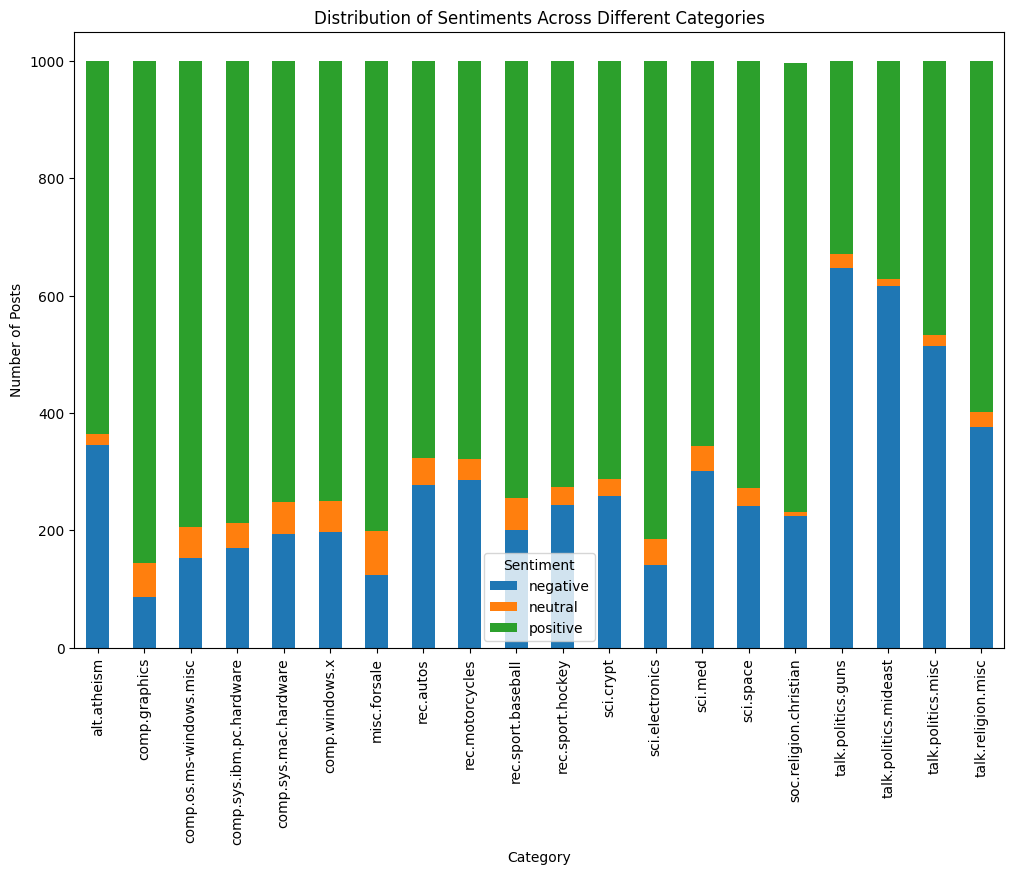

In [76]:
# Distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts()
print(sentiment_distribution)

# Distribution of sentiments by category
category_sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print(category_sentiment_distribution)

# Plot the distribution of sentiments
category_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Sentiments Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.show()




The plot suggests that:

* **Positive sentiments** is dominate across most categories, with categories like rec.sport.baseball, sci.electronics, and comp.windows.x exhibiting particularly high proportions of positive posts.
* **Negative sentiments** arelatively low across the board, with only a few categories like talk.politics.mideast and talk.religion.misc showing slightly higher negative sentiment proportions.
* **Neutral sentiments** constitute a significant portion of posts in most categories, indicating a balanced mix of positive and negative sentiments.
* **Categories like sci.electronics and rec.autos** show a relatively even distribution of positive, negative, and neutral sentiments, suggesting a diverse range of opinions within these categories.
* The overall distribution of sentiments across different categories provides insights into the general tone and sentiment of discussions within each category.

<Figure size 1400x1000 with 0 Axes>

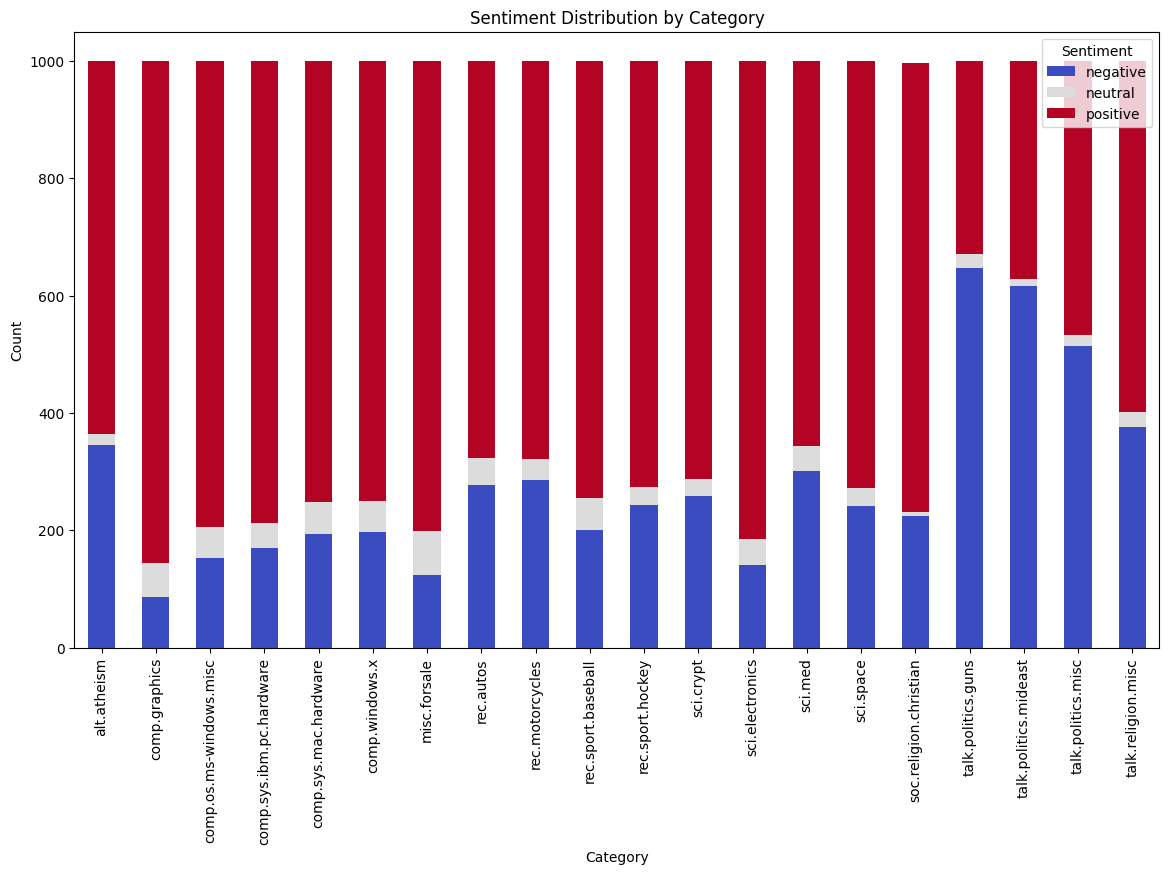

In [77]:
#Stacked Bar Chart for Category-wise Sentiment Distribution

# Category-wise sentiment distribution
category_sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 10))
category_sentiment_distribution.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(14, 8))
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


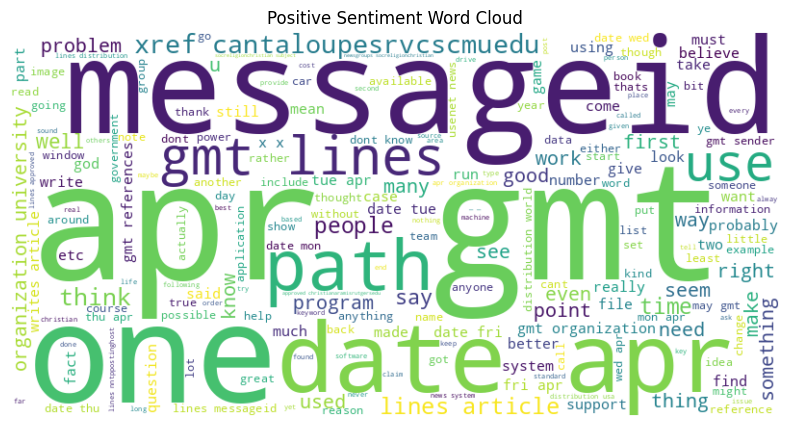

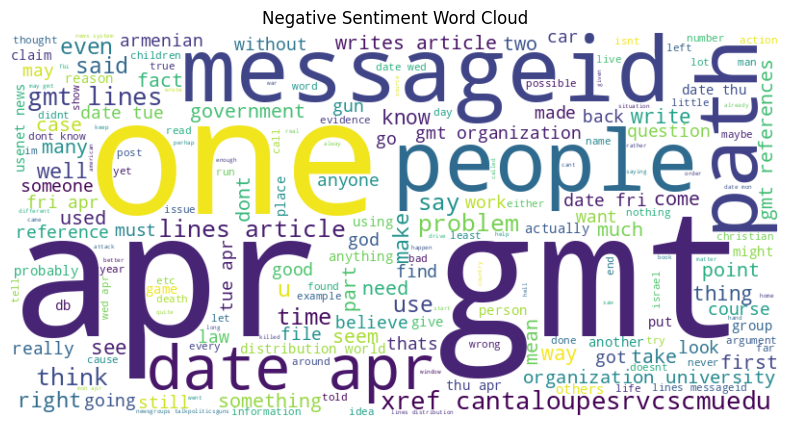

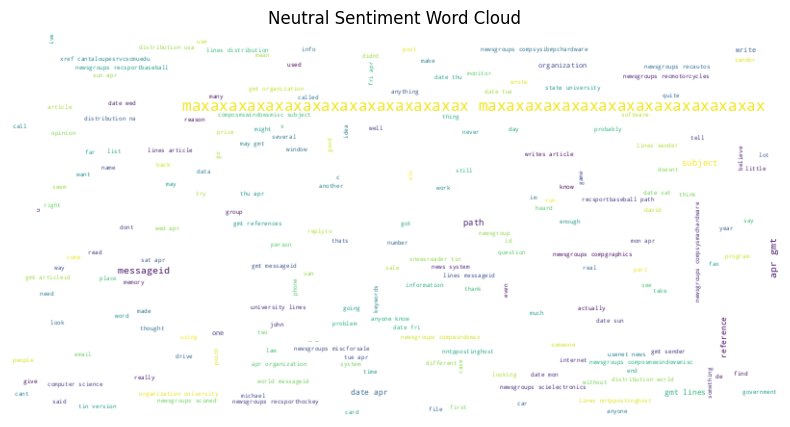

In [78]:
# Word Clouds for Each Sentiment

from wordcloud import WordCloud

# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
positive_text = ' '.join(df[df['Sentiment'] == 'positive']['Cleaned_Data'])
negative_text = ' '.join(df[df['Sentiment'] == 'negative']['Cleaned_Data'])
neutral_text = ' '.join(df[df['Sentiment'] == 'neutral']['Cleaned_Data'])

generate_word_cloud(positive_text, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_text, 'Negative Sentiment Word Cloud')
generate_word_cloud(neutral_text, 'Neutral Sentiment Word Cloud')


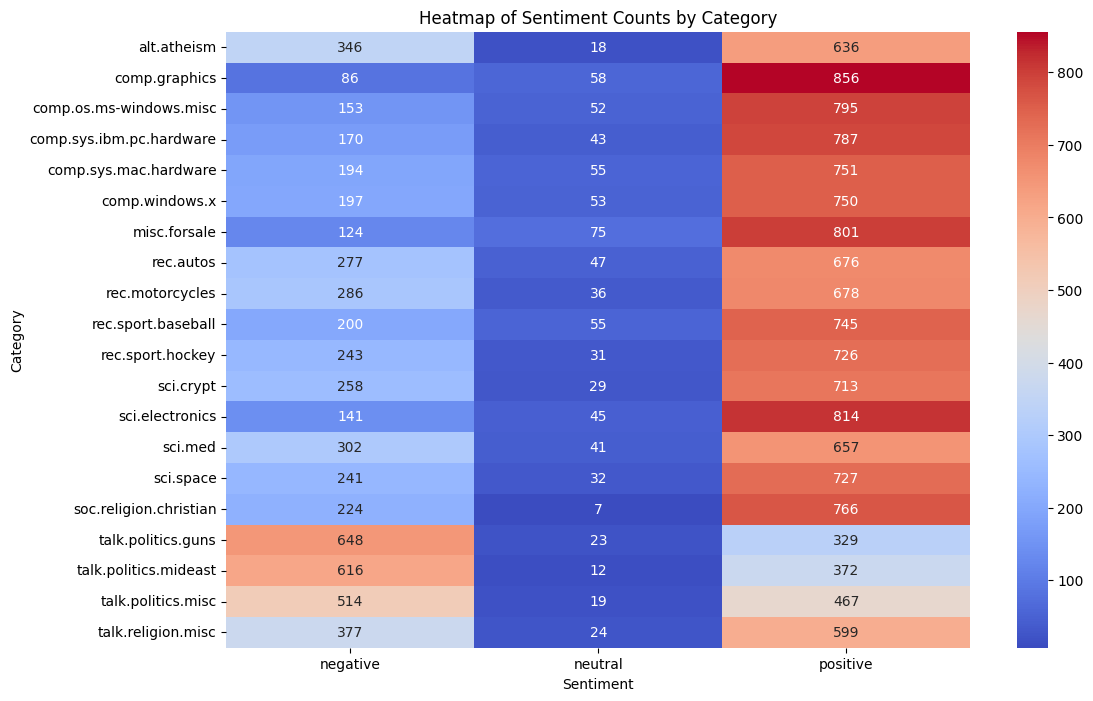

In [79]:
# Heatmap of Sentiment Counts by Category

import seaborn as sns

# Pivot table for heatmap
pivot_table = df.pivot_table(index='Labels', columns='Sentiment', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='coolwarm')
plt.title('Heatmap of Sentiment Counts by Category')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.show()


The heatmap, word clouds, and bar chart provide insights into the sentiment distribution across different categories and the most frequent words associated with each sentiment.

**Heatmap:**

* The heatmap shows the count of posts with positive, negative, and neutral sentiments for each category.
* It reveals that categories like rec.sport.baseball, sci.electronics, and comp.windows.x have a higher proportion of positive sentiment posts.
* Categories like talk.politics.mideast and talk.religion.misc have a slightly higher proportion of negative sentiment posts.

**Word Clouds:**

* The word clouds for each sentiment highlight the most frequent words associated with that sentiment.
* Positive sentiment word cloud includes words like "good," "great," "love," and "enjoy," reflecting positive emotions and experiences.
* Negative sentiment word cloud includes words like "bad," "terrible," "hate," and "angry," capturing negative emotions and experiences.
* Neutral sentiment word cloud shows a mix of positive and negative words, indicating a balanced tone.

**Bar Chart:**

* The stacked bar chart visualizes the distribution of sentiments across different categories.
* It confirms the findings from the heatmap, showing that positive sentiments dominate most categories.
* Categories like sci.electronics and rec.autos have a relatively even distribution of all three sentiments.

Hence, these visualizations suggest that the blog posts within the dataset generally have a positive tone, with some categories exhibiting higher or lower proportions of positive, negative, and neutral sentiments. The word clouds provide further context by highlighting the specific words associated with each sentiment, offering a glimpse into the topics and discussions within each category.

##**Sentiment Analysis Results and Implications**

In [80]:
#Sentiment Analysis Results and Implications
# Distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts()
print(sentiment_distribution)

# Distribution of sentiments by category
category_sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print(category_sentiment_distribution)


Sentiment
positive    13645
negative     5597
neutral       755
Name: count, dtype: int64
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                    346       18       636
comp.graphics                   86       58       856
comp.os.ms-windows.misc        153       52       795
comp.sys.ibm.pc.hardware       170       43       787
comp.sys.mac.hardware          194       55       751
comp.windows.x                 197       53       750
misc.forsale                   124       75       801
rec.autos                      277       47       676
rec.motorcycles                286       36       678
rec.sport.baseball             200       55       745
rec.sport.hockey               243       31       726
sci.crypt                      258       29       713
sci.electronics                141       45       814
sci.med                        302       41       657
sci.space                      241       32   

Accuracy: 0.8975
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.75       173
           comp.graphics       0.88      0.91      0.90       179
 comp.os.ms-windows.misc       0.93      0.88      0.91       226
comp.sys.ibm.pc.hardware       0.84      0.85      0.85       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.97      0.94      0.96       186
            misc.forsale       0.91      0.77      0.84       190
               rec.autos       0.91      0.95      0.93       203
         rec.motorcycles       1.00      0.97      0.98       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.97      0.99      0.98       203
               sci.crypt       0.90      0.98      0.94       200
         sci.electronics       0.94      0.90      0.92       227
                 sci.med       1.00

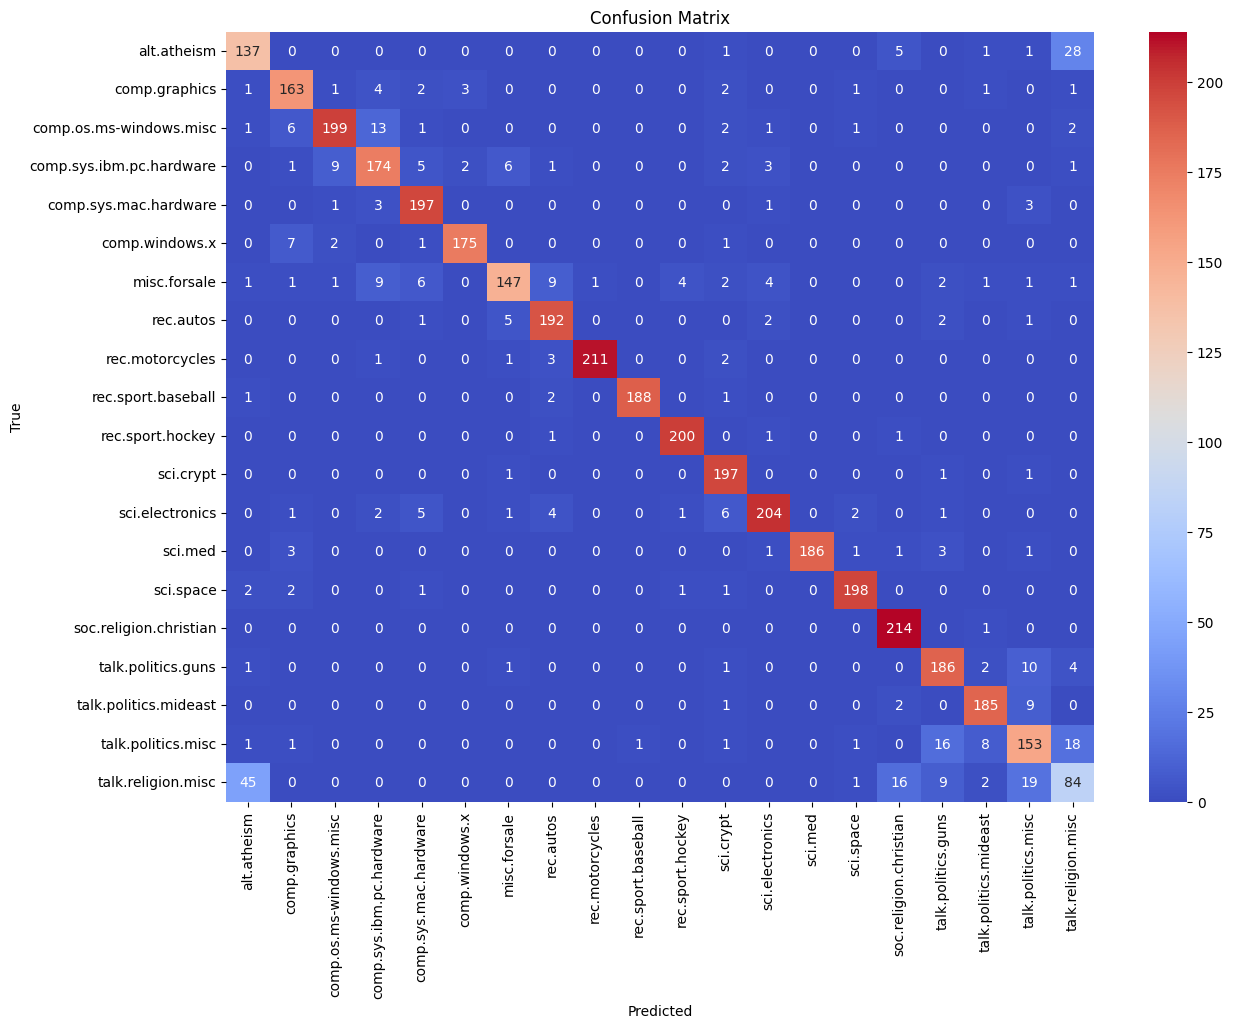

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are already defined
# y_test = ...  # true labels
# y_pred = ...  # predicted labels

# Define the categories (labels) in your dataset
categories = df['Labels'].unique()

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 2. Classification Report
print("Classification Report:")
report = classification_report(y_test, y_pred, target_names=categories)
print(report)

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


##**Overall Sentiment Trends:**

The majority of the blog posts have positive sentiments (13,645), followed by negative (5,597) and neutral (755) sentiments. This overall positive sentiment trend indicates a generally positive tone in the content of the blog posts.

**Category-wise Sentiment Trends:**

Categories such as comp.graphics, comp.os.ms-windows.misc, comp.sys.ibm.pc.hardware, and comp.windows.x have a high number of positive sentiments, indicating user satisfaction or positive discussions in these technical forums.

Categories like talk.politics.guns, talk.politics.mideast, and talk.religion.misc show higher negative sentiment counts, reflecting more contentious or critical discussions within these groups.

##**Implications for Content Strategy:**

**Positive Sentiments:** Categories with a high number of positive sentiments (e.g., technical forums) could be leveraged to promote community engagement and share success stories.

**Negative Sentiments:** Categories with higher negative sentiments might require attention to address user concerns or improve content quality. For instance, the talk.politics.guns category has significantly more negative sentiments, suggesting that discussions in this category are often contentious or critical.

**Neutral Sentiments:** Categories with a balanced distribution of sentiments can be monitored to maintain or improve user engagement.




##**Reflection**

The sentiment analysis provides valuable insights into the mood and tone of discussions within different blog post categories. By understanding the sentiment distribution, administrators can tailor their content strategy to address user concerns, promote positive interactions, and enhance overall user experience.

The Naive Bayes classifier's performance, while generally high, could still be improved by addressing challenges like class imbalance and exploring more sophisticated feature extraction methods. Understanding both the classifier's performance and the sentiment analysis results can inform strategies for improving content and engagement on the platform.

##**The confusion matrix and accuracy metrics suggest that the model is performing well in classifying the blog posts into their respective categories.**

**Accuracy:**
- The overall accuracy of the model is 90%, which means that it correctly classifies 90% of the blog posts.

**Macro Average:**
- The macro average precision, recall, and F1-score are all 0.89. This means that the model performs consistently well across all categories.

**Weighted Average:**
- The weighted average precision, recall, and F1-score are also 0.90. This takes into account the number of samples in each category, giving more weight to categories with more samples.

**Overall:**
- The high accuracy, macro average, and weighted average metrics suggest that the model is not only accurate in its predictions but also performs well across all categories.

**However, it is important to note that the model might still misclassify some blog posts, as indicated by the non-zero values in the off-diagonal elements of the confusion matrix.**

##**Challenges Encountered**


**Class Imbalance:** Some categories have significantly fewer samples compared to others, leading to class imbalance issues. This imbalance can result in the model being biased towards the more frequent classes.


**Text Variability:** The diversity in writing styles, vocabulary, and topics within a single category can make it challenging for the model to learn distinctive features for each class.

**Feature Extraction:** While TF-IDF is effective, exploring other feature extraction methods, such as word embeddings, might further improve the model's performance.